In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from IPython.display import Image

import src
from src.reload import deep_reload

This notebook shows an example of electricity Locational Marginal Prices (LMPs) for a simple power grid of three nodes. this is use as a simple validation case for the package. The setup in this notebook replicates that of https://github.com/kyribaker/3bus_LMPs. Results herein should match those in the below image.

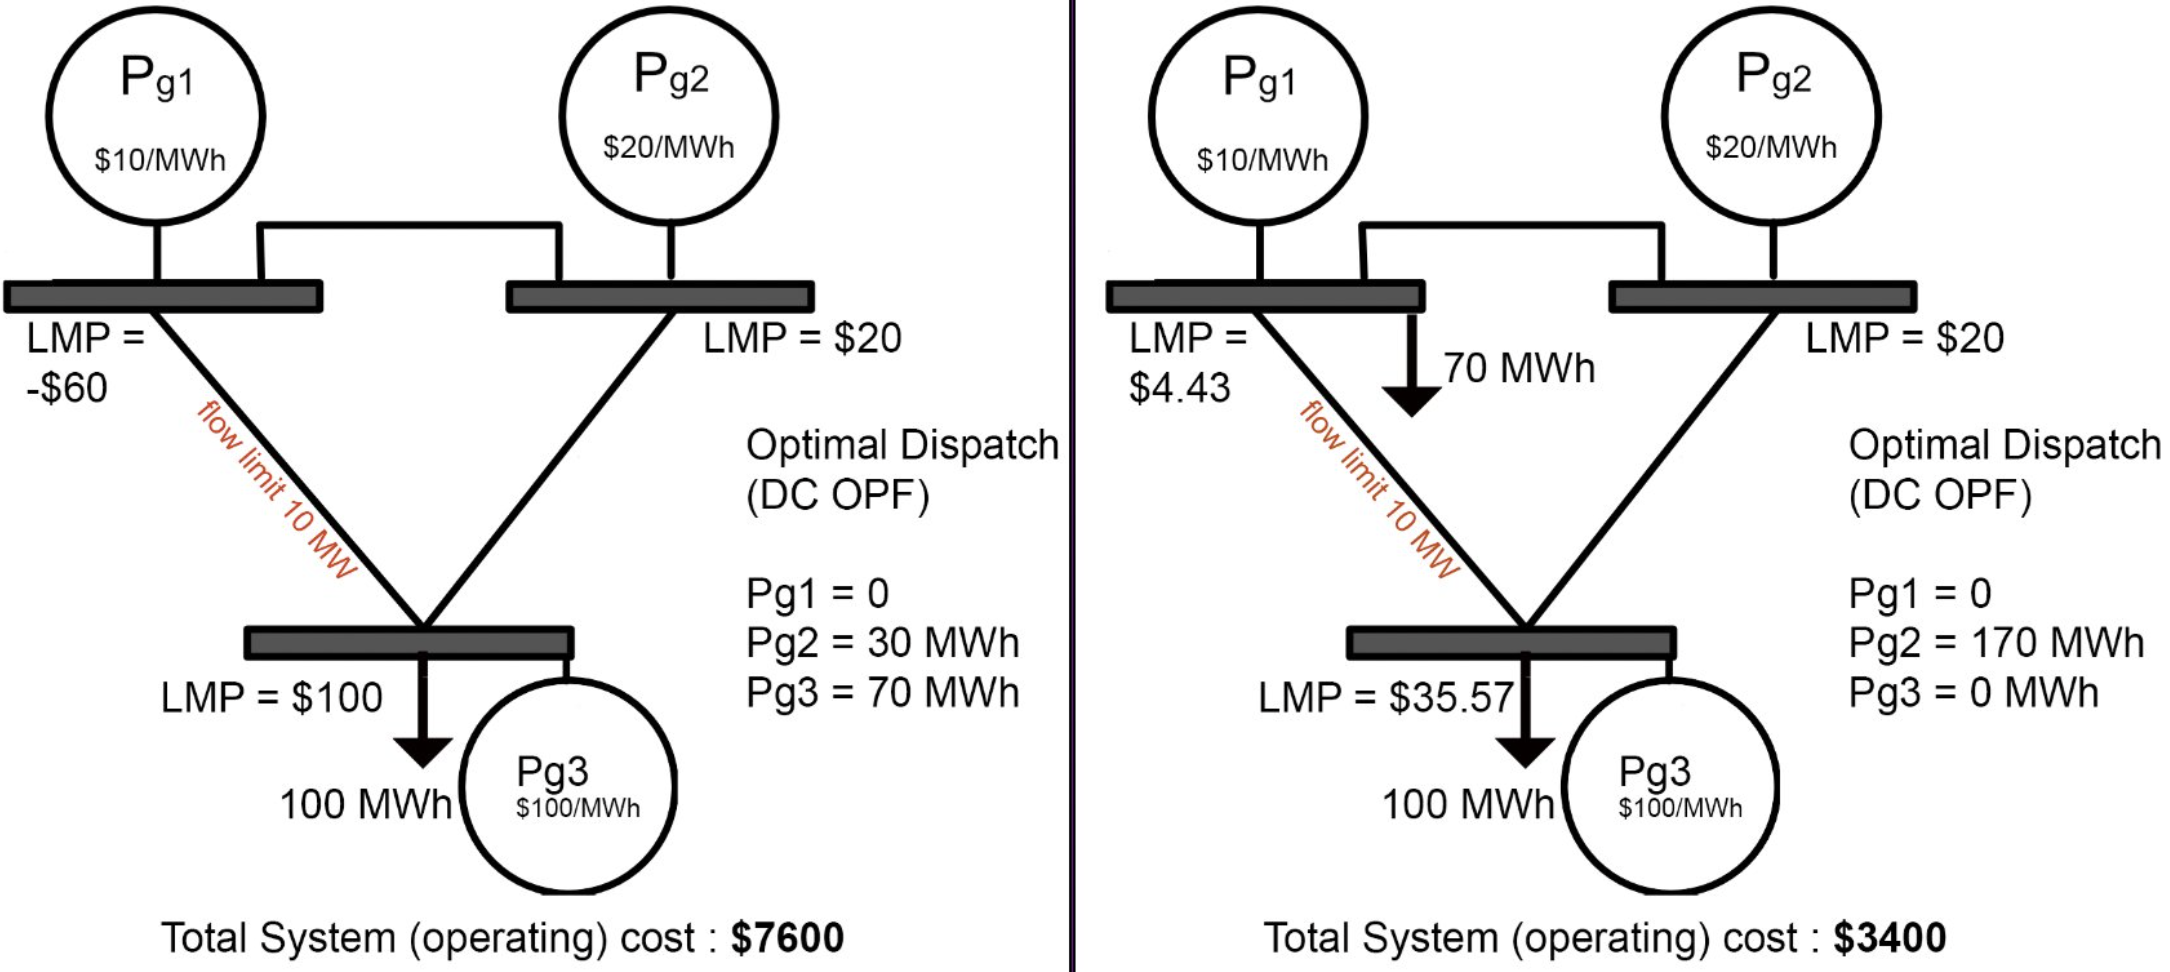

In [2]:
Image(filename = "figs/3bus_LMP.png", width=700)

In [3]:
# Generating graph - test case - no load at bus 0

nodes = []

# Buses
nodes.append({'id': 'bus_0', 'type': 'bus'})
nodes.append({'id': 'bus_1', 'type': 'bus'})
nodes.append({'id': 'bus_2', 'type': 'bus'})

# Generators
nodes.append({'id': 'gen_0', 'type': 'generation', 'cost': 10})
nodes.append({'id': 'gen_1', 'type': 'generation', 'cost': 20})
nodes.append({'id': 'gen_2', 'type': 'generation', 'cost': 100})

# Loads
nodes.append({'id': 'load_2', 'type': 'load', 'value': -100})

links = []

# Generators to buses
links.append({'source': 'gen_0' ,'target': 'bus_0', 'efficiency': 1, 'type': 'feeder'})
links.append({'source': 'gen_1', 'target': 'bus_1', 'efficiency': 1, 'type': 'feeder'})
links.append({'source': 'gen_2', 'target': 'bus_2', 'efficiency': 1, 'type': 'feeder'})

# Loads to buses
links.append({'source': 'load_2' ,'target': 'bus_2', 'susceptance': 1, 'efficiency': 1,
              'type': 'feeder'})

eff = 1
sus = 1

# Buses to buses
links.append({'source': 'bus_0' ,'target': 'bus_1', 'susceptance': sus, 'efficiency': eff,
              'type': 'line'})
links.append({'source': 'bus_0' ,'target': 'bus_2', 'susceptance': sus, 'efficiency': eff,
              'type': 'line', 'bounds': (-10, 10)})
links.append({'source': 'bus_1' ,'target': 'bus_2', 'susceptance': sus, 'efficiency': eff,
              'type': 'line'})

nlg = {'nodes': nodes, 'links': links}
graph = src.graph.graph_from_nlg(nlg)

In [4]:
deep_reload(src)

time = [0, ]

opf = src.optimization.DC_OPF(graph, time)

In [5]:
deep_reload(src)

solver_kwargs={'_name': 'cbc', 'executable': 'src/cbc'}

opf.solve(**solver_kwargs)

In [6]:
opf.solution

{'data':    bus_0  bus_1  bus_2  gen_0  gen_1  gen_2  bus_0_lmp  bus_1_lmp  bus_2_lmp
 0   10.0   20.0    0.0    0.0   30.0   70.0      -60.0       20.0      100.0,
 'objective': 7600.0}

In [7]:
# Generating graph - test case - load at bus 0

nodes = []

# Buses
nodes.append({'id': 'bus_0', 'type': 'bus'})
nodes.append({'id': 'bus_1', 'type': 'bus'})
nodes.append({'id': 'bus_2', 'type': 'bus'})

# Generators
nodes.append({'id': 'gen_0', 'type': 'generation', 'cost': 10})
nodes.append({'id': 'gen_1', 'type': 'generation', 'cost': 20})
nodes.append({'id': 'gen_2', 'type': 'generation', 'cost': 100})

# Loads
nodes.append({'id': 'load_0', 'type': 'load', 'value': -70})
nodes.append({'id': 'load_2', 'type': 'load', 'value': -100})

links = []

# Generators to buses
links.append({'source': 'gen_0' ,'target': 'bus_0', 'efficiency': 1, 'type': 'feeder'})
links.append({'source': 'gen_1', 'target': 'bus_1', 'efficiency': 1, 'type': 'feeder'})
links.append({'source': 'gen_2', 'target': 'bus_2', 'efficiency': 1, 'type': 'feeder'})

# Loads to buses
links.append({'source': 'load_0' ,'target': 'bus_0', 'efficiency': 1, 'type': 'feeder'})
links.append({'source': 'load_2' ,'target': 'bus_2', 'efficiency': 1, 'type': 'feeder'})

eff = 1
sus = 1

# Buses to buses
links.append({'source': 'bus_0' ,'target': 'bus_1', 'susceptance': sus, 'efficiency': eff,
              'type': 'line'})
links.append({'source': 'bus_0' ,'target': 'bus_2', 'susceptance': sus, 'efficiency': eff,
              'type': 'line', 'bounds': (-10, 10)})
links.append({'source': 'bus_1' ,'target': 'bus_2', 'susceptance': sus, 'efficiency': eff,
              'type': 'line'})

nlg = {'nodes': nodes, 'links': links}
graph = src.graph.graph_from_nlg(nlg)

In [11]:
deep_reload(src)

time = [0, ]

opf = src.optimization.DC_OPF(graph, time)

In [12]:
deep_reload(src)

solver_kwargs={'_name': 'cbc', 'executable': 'src/cbc'}

opf.solve(**solver_kwargs)

In [13]:
opf.solution

{'data':    bus_0  bus_1  bus_2  gen_0  gen_1  gen_2  bus_0_lmp  bus_1_lmp  bus_2_lmp
 0   10.0   90.0    0.0    0.0  170.0    0.0       10.0       20.0       30.0,
 'objective': 3400.0}